### evaulation includes three types
#### 1.ESTIMATOR SCORE METHOD
#### 2.THE SCORING PARAMETER
#### 3.PROBLEM SPECIFIC METRIC FUNCTION

###  1.by score

In [68]:
import os
import pandas as pd
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
df=pd.read_csv('13.1 heart-disease.csv')
df
from sklearn.model_selection import train_test_split
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7540983606557377

### 2.by scoring parameter(cross)

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score=cross_val_score(clf,x,y,cv=10)

In [71]:
cross_val_score

array([0.90322581, 0.80645161, 0.87096774, 0.93333333, 0.9       ,
       0.8       , 0.73333333, 0.83333333, 0.7       , 0.83333333])

### background will be written on note book cv-cross validation times

### accuracy using cross_val

In [72]:
import numpy as np
np.mean(cross_val_score)

0.8313978494623656

# 3.MODEL EVALUATION USING METRICS

### EVALUATION  METRICS FOR THE CLASSICIFICATION PRBLM

In [73]:
from sklearn.model_selection import train_test_split
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9016393442622951

### 3.1 accuracy(using np.mean)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [75]:
cr=cross_val_score(clf,x,y, cv=10)

In [76]:
cr

array([0.87096774, 0.83870968, 0.83870968, 0.93333333, 0.86666667,
       0.73333333, 0.73333333, 0.83333333, 0.7       , 0.8       ])

In [77]:
np.mean(cr)

0.8148387096774193

### 3.2 area under receiver operating curve



### AUC/ROC

In [78]:
np.random.seed(12)
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier()

In [79]:
y_prd=clf.predict_proba(x_test)

In [80]:
y_prd[:10]

array([[0.17, 0.83],
       [0.42, 0.58],
       [0.02, 0.98],
       [0.79, 0.21],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.47, 0.53],
       [0.8 , 0.2 ],
       [0.91, 0.09],
       [0.72, 0.28]])

In [81]:
y_prd_positive=y_prd[:,1]

In [82]:
y_prd_po=y_prd[:,0]

In [83]:
y_prd_po

array([0.17, 0.42, 0.02, 0.79, 0.99, 0.  , 0.47, 0.8 , 0.91, 0.72, 0.31,
       0.88, 1.  , 0.35, 0.2 , 0.42, 0.73, 0.68, 0.08, 0.42, 0.15, 0.54,
       0.69, 0.02, 0.15, 0.61, 0.52, 0.01, 0.71, 0.98, 0.03, 0.13, 0.96,
       0.19, 0.33, 0.09, 0.6 , 0.14, 0.31, 0.9 , 0.68, 0.1 , 0.2 , 0.96,
       0.08, 0.73, 0.76, 0.85, 0.27, 0.05, 0.26, 0.13, 0.44, 0.61, 0.32,
       0.51, 0.79, 0.16, 0.89, 0.86, 0.75])

In [84]:
y_prd_positive

array([0.83, 0.58, 0.98, 0.21, 0.01, 1.  , 0.53, 0.2 , 0.09, 0.28, 0.69,
       0.12, 0.  , 0.65, 0.8 , 0.58, 0.27, 0.32, 0.92, 0.58, 0.85, 0.46,
       0.31, 0.98, 0.85, 0.39, 0.48, 0.99, 0.29, 0.02, 0.97, 0.87, 0.04,
       0.81, 0.67, 0.91, 0.4 , 0.86, 0.69, 0.1 , 0.32, 0.9 , 0.8 , 0.04,
       0.92, 0.27, 0.24, 0.15, 0.73, 0.95, 0.74, 0.87, 0.56, 0.39, 0.68,
       0.49, 0.21, 0.84, 0.11, 0.14, 0.25])

In [85]:
from sklearn.metrics import roc_curve

###  calculating fpr,tpr,thresholds

In [86]:
 fpr,tpr,thresholds =roc_curve(y_test,y_prd_positive,)

In [87]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.09677419, 0.16129032,
       0.16129032, 0.19354839, 0.19354839, 0.29032258, 0.41935484,
       0.4516129 , 0.4516129 , 0.48387097, 0.5483871 , 0.5483871 ,
       0.58064516, 0.64516129, 0.77419355, 0.77419355, 0.83870968,
       0.90322581, 1.        ])

In [88]:
tpr

array([0.        , 0.03333333, 0.06666667, 0.13333333, 0.2       ,
       0.26666667, 0.33333333, 0.4       , 0.43333333, 0.46666667,
       0.56666667, 0.63333333, 0.7       , 0.7       , 0.7       ,
       0.73333333, 0.8       , 0.9       , 0.9       , 0.9       ,
       0.9       , 0.93333333, 0.93333333, 0.93333333, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 1.        , 1.        ,
       1.        , 1.        ])

In [89]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.95, 0.92, 0.9 , 0.87, 0.86, 0.85, 0.81,
       0.8 , 0.73, 0.69, 0.67, 0.65, 0.58, 0.49, 0.4 , 0.32, 0.31, 0.29,
       0.28, 0.27, 0.25, 0.24, 0.21, 0.12, 0.11, 0.09, 0.04, 0.  ])

In [90]:
import matplotlib.pyplot as plt

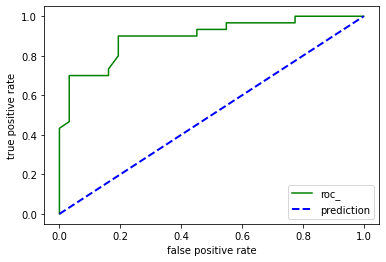

In [91]:
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()
 

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
roc_auc_score(y_test,y_prd_positive)

0.896236559139785

### 3.3 confusion matrix

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [96]:
 from sklearn.ensemble import RandomForestClassifier

In [97]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7377049180327869

In [98]:
 y_pred=clf.predict(x_test)

In [99]:
 y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [100]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [101]:
confusion_matrix

array([[23,  7],
       [ 9, 22]], dtype=int64)

In [102]:
pd.crosstab(y_test,y_pred)

col_0,0,1
target,,
0,23,7
1,9,22


### we plot from seaborn 

Text(33.0, 0.5, 'predicted')

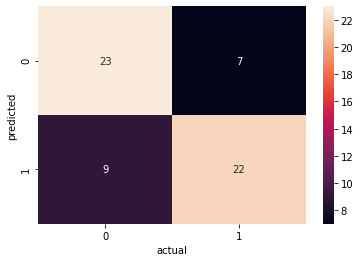

In [103]:
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')

In [104]:
### from this we interpret that 
tp=23
fp=8
tn=23
fn=7

### 3.4 classification report

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.76      0.71      0.73        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [106]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [107]:
s=np.zeros(10000)
s[0]=1

In [108]:
s[0]

1.0

In [109]:
s

array([1., 0., 0., ..., 0., 0., 0.])

In [110]:
s_pred=np.zeros(10000)

In [111]:
s_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
print(classification_report(s,s_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### we say that this is imabalance



### how we take care about imbalance by oversampling or under sampling

### 4.solving a ml problem for regression

In [113]:
from sklearn.datasets import load_boston

In [114]:
d=load_boston()

In [115]:
d

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [116]:
df=pd.DataFrame(d['data'],columns=d['feature_names'])
df['target']=pd.Series(d['target'])

In [117]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [118]:
x=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split

In [119]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2


In [120]:
xtrain,x_test,y_train,y_tes=train_test_split(x,y,test_size=0.2)

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
clr=RandomForestRegressor()
clr.fit(xtrain,y_train)

RandomForestRegressor()

### 4.1 by score

In [123]:
clr.score(x_test,y_tes)

0.8933427669447335

### 4.2 by using r2_score

In [124]:
from sklearn.metrics import r2_score

In [125]:
y_pred=clr.predict(x_test)
r2_score(y_tes,y_pred)

0.8933427669447335

In [126]:
y_tes.mean()

21.831372549019598

In [127]:
np.full([2,2],'r')

array([['r', 'r'],
       ['r', 'r']], dtype='<U1')

In [128]:
import numpy as np
y_tes_mean=np.full(len(y_test),y_test.mean())
y_tes_mean

array([0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672, 0.50819672, 0.50819672, 0.50819672, 0.50819672,
       0.50819672])

In [129]:
r2_score(y_tes,y_tes_mean)

ValueError: Found input variables with inconsistent numbers of samples: [102, 61]

In [130]:
r2_score(y_tes,y_tes)

1.0

### 4.3 by using mean absolute error(MAE)

### MAE is the average differences between the actual values to the predicted values




In [131]:
from sklearn.metrics import mean_absolute_error

In [132]:
mean_absolute_error(y_tes,y_pred)

2.125941176470588

In [133]:
dfm=pd.DataFrame(data={'actual':y_tes,'pred':y_pred},)

In [134]:
dfm['differ']=dfm['pred']-dfm['actual']

In [135]:
dfm

,actual,pred,differ
19,18.2,19.969,1.769
45,19.3,19.896,0.596
168,23.8,21.571,-2.229
148,17.8,14.196,-3.604
479,21.4,19.321,-2.079
...,...,...,...
267,50.0,41.898,-8.102
2,34.7,33.898,-0.802
475,13.3,13.531,0.231
451,15.2,17.071,1.871


### MAE gives you an idea of how wrong our prediction(differfences) is.....

# 4.4 MEAN SQUARED ERROR(MSE)

In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
mean_squared_error(y_tes,y_pred)

8.40450590196078

In [138]:
dfm

,actual,pred,differ
19,18.2,19.969,1.769
45,19.3,19.896,0.596
168,23.8,21.571,-2.229
148,17.8,14.196,-3.604
479,21.4,19.321,-2.079
...,...,...,...
267,50.0,41.898,-8.102
2,34.7,33.898,-0.802
475,13.3,13.531,0.231
451,15.2,17.071,1.871


In [139]:
dfm['sq']=dfm['differ']**2
dfm['sq'].mean()

8.404505901960784

In [141]:
from sklearn.metrics import precision_score
precision_score(y_tes,y_pred)
#cant do this for regression

ValueError: continuous is not supported

#### detailed metrics in notes

# 5.. improving ml model through tuninig

In [ ]:
clf=RandomForestClassifier( n_estimators=100)

In [ ]:
clf.get_params()

### three ways 1.by hand,    2.Randomly with random search CV,   3.EXHUASTIVELY WITH GRID,SEARCH CV

## 5..1(BY HAND)

In [144]:
df=pd.read_csv('13.1 heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [145]:
shuffled_df=df.sample(frac=1)
shuffled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1


In [146]:
np.random.seed(23)
shuffled_df=df.sample(frac=1)
x=shuffled_df.drop('target',axis=1)
y=shuffled_df['target']
train_split=round(0.7*len(shuffled_df))
valid_split=round(train_split+len(0.15*shuffled_df))
xtrain,ytrain=x[:train_split],y[:train_split]
xvalid,yvalid=x[train_split:valid_split],y[train_split:valid_split]
xtest,ytest=x[valid_split:],y[valid_split:]

In [147]:
np.random.seed(23)
from sklearn.ensemble import RandomForestClassifier
RRR=RandomForestClassifier()
RRR.fit(xtrain,ytrain)

RandomForestClassifier()

In [148]:
y_pred=RRR.predict(xvalid)

In [149]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [151]:
def evalute_model(y_true,y_pred):
    acc=accuracy_score(y_true, y_pred)
    prec=precision_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred)
    f1score=f1_score(y_true, y_pred)
    dict={'acc':(acc),'prec':(prec),'recall':(recall),'f1score':(f1score)}
    return dict

In [152]:
evalute_model(yvalid,y_pred)

{'acc': 0.8571428571428571,
 'prec': 0.8545454545454545,
 'recall': 0.9038461538461539,
 'f1score': 0.8785046728971962}

### by estimator


In [153]:
RRR2=RandomForestClassifier( n_estimators=100)
RRR2.fit(xtrain,ytrain)
y_pred=RRR2.predict(xvalid)


In [154]:
evalute_model(yvalid,y_pred)

{'acc': 0.8791208791208791,
 'prec': 0.8727272727272727,
 'recall': 0.9230769230769231,
 'f1score': 0.897196261682243}

### by maxdepth

In [155]:
RRR3=RandomForestClassifier( n_estimators=100,max_depth=15,min_samples_split=2)
RRR3.fit(xtrain,ytrain)
y_pred=RRR3.predict(xvalid)

In [156]:
evalute_model(yvalid,y_pred)

{'acc': 0.8681318681318682,
 'prec': 0.8448275862068966,
 'recall': 0.9423076923076923,
 'f1score': 0.890909090909091}

### by using these parametrs we can improve the model we can deep by another example

# 5...2(RANDOMLY WITH RANDOM SEARCH CV)

In [157]:
np.random.seed(23)
grid={'n_estimators':[100,200,300,400,800,1000,1200],
      'max_depth': [None,5,10,15,20,25,30],
      'max_features':['auto', 'sqrt'], 
      'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,4]}
from sklearn.model_selection import train_test_split,RandomizedSearchCV
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf=RandomForestClassifier()
s_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,cv=10,
    n_iter=10,
    n_jobs=2,
    verbose=2)

In [158]:
s_clf.fit(x_train,y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [159]:
s_clf.best_params_ 

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [160]:
y_pred=s_clf.predict(x_test)

In [161]:
evalute_model(y_test,y_pred)

{'acc': 0.8421052631578947,
 'prec': 0.8181818181818182,
 'recall': 0.9,
 'f1score': 0.8571428571428572}

### 5..3 GRID SEARCH CV

###  SAME AS THE RANDOMIZED SEARCH CV BUT WE USE GRID SEARCH CV IN  THAT  PLACE